<a href="https://colab.research.google.com/github/Saeedaaman/Captsone-Project/blob/lab/Translations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Data Preparation and Preprocessing
In this section, we perform the initial steps of data loading, preprocessing, and preparation for our neural network model. The steps include:

Load the Data:

We load the Wakhi to English translation dataset using Pandas. This dataset is assumed to be in a CSV format.
Extract Words:

Wakhi and English words are extracted from the dataset. These words represent our input data (Wakhi words) and labels (their English translations).
Encode Words:

Both Wakhi and English words are encoded into integer representations using Scikit-Learn's LabelEncoder. This encoding is necessary as neural networks require numerical input.
One-Hot Encoding:

We define a function one_hot_encode to convert these integer representations into one-hot encoded vectors. One-hot encoding is a common method to handle categorical data in machine learning.
Determine Vocabulary Sizes:

The vocabulary sizes for both Wakhi and English are determined, which are crucial for setting the input and output dimensions of our neural network.
Apply One-Hot Encoding:

The actual one-hot encoding is applied to both Wakhi and English words, transforming them into binary vectors.
Split the Data:

The one-hot encoded data is split into training and test sets using train_test_split. This split is essential for training and later evaluating our model.
Inspect Data Shapes:

Finally, we inspect the shapes of our training and test datasets along with the vocabulary sizes to confirm that our data is correctly structured for the upcoming training process.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Load the data
file_path = '/content/Wakhi_Word - Sheet1 (1).csv'
wakhi_data = pd.read_csv(file_path)

# Extracting Wakhi and English words
wakhi_words = wakhi_data['Wakhi'].values
english_words = wakhi_data['English'].values

# Encoding words to integers using LabelEncoder
wakhi_encoder = LabelEncoder()
english_encoder = LabelEncoder()

wakhi_encoded = wakhi_encoder.fit_transform(wakhi_words)
english_encoded = english_encoder.fit_transform(english_words)

# Function to convert encoded words to one-hot vectors
def one_hot_encode(indices, num_classes):
    return np.eye(num_classes)[indices]

# Vocabulary sizes
wakhi_vocab_size = len(wakhi_encoder.classes_)
english_vocab_size = len(english_encoder.classes_)

# One-hot encoding
wakhi_one_hot = one_hot_encode(wakhi_encoded, wakhi_vocab_size)
english_one_hot = one_hot_encode(english_encoded, english_vocab_size)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wakhi_one_hot, english_one_hot, test_size=0.2, random_state=42)

# The shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape, wakhi_vocab_size, english_vocab_size


((1680, 2095), (421, 2095), (1680, 2012), (421, 2012), 2095, 2012)

In [3]:
wakhi_data

,Wakhi,English
0,Atrem,to this
1,Atumẽr,"this amount, this number, this much"
2,Atumrẽr,till that
3,Awora,"unguided , uncontrol led, bewildered"
4,Az̃ir,like this
...,...,...
2096,z̃horbor,raged
2097,z̃huq,fraud
2098,z̃huy,"a lake, pond"
2099,z̃hũghẽlat,my mistake


Neural Network Model Definition and Training
This section outlines the creation and training of our neural network model for the language translation task:

Model Definition:

We define TranslationModel, a simple neural network class using PyTorch's nn.Module. This model is tailored for the task of translating words from Wakhi to English.
The model includes two fully connected layers (fc1 and fc2). The first layer maps the input to a hidden layer, and the second layer maps the hidden layer to the output layer.
A ReLU activation function is used after the first layer, and a Softmax function is applied at the output layer.
Model Instantiation:

We instantiate TranslationModel with the appropriate input size (the size of the Wakhi vocabulary), output size (the size of the English vocabulary), and a chosen hidden layer size.
Loss Function and Optimizer:

We use Cross-Entropy Loss (nn.CrossEntropyLoss) as our loss function, suitable for classification tasks.
The optimizer used is Adam (optim.Adam), which is a popular choice for its efficiency in training neural networks.
Data Conversion to Tensors:

The training and test data are converted into PyTorch tensors. This conversion is necessary as PyTorch models work with tensors.
Training Function:

A function train_model is defined to train the model. This function takes the model, loss criterion, optimizer, training data, and the number of epochs as inputs.
The function records the loss at each epoch, which is useful for monitoring the training process.
Model Training:

We train the model using the training data (X_train_tensor and y_train_tensor) for a specified number of epochs.
Loss Visualization:

After training, we visualize the training loss over epochs using matplotlib. This plot is essential to understand how the model's performance improved over time.

Epoch [100/1000], Loss: 7.6058
Epoch [200/1000], Loss: 7.2238
Epoch [300/1000], Loss: 7.0923
Epoch [400/1000], Loss: 7.0008
Epoch [500/1000], Loss: 6.9435
Epoch [600/1000], Loss: 6.9040
Epoch [700/1000], Loss: 6.8670
Epoch [800/1000], Loss: 6.8380
Epoch [900/1000], Loss: 6.8102
Epoch [1000/1000], Loss: 6.7888


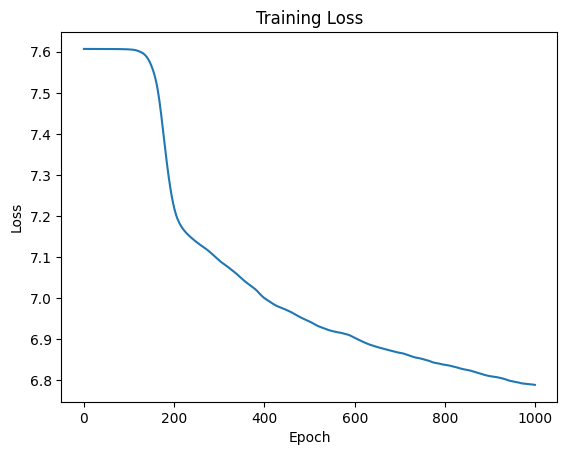

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Defining the neural network model
class TranslationModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TranslationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Model instantiation
input_size = wakhi_vocab_size
hidden_size = 128  # This can be tuned
output_size = english_vocab_size
model = TranslationModel(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
y_train_tensor = torch.tensor(y_train, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test, dtype=torch.float)

import matplotlib.pyplot as plt

# Modified training function to record loss at each epoch
def train_model(model, criterion, optimizer, X_train, y_train, epochs=1000):
    losses = []
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, torch.max(y_train, 1)[1])

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return losses

# Train the model and get the loss values
losses = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, epochs=1000)

# Plotting the training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [5]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4133 sha256=63e81bea71e0c5af8fb72daa64e36fdafb79f7ec038ca12f6c5fb0a29b87fec2
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [6]:
from torchviz import make_dot

# Assuming X_train is a numpy array, convert a single example to a tensor
example_input = torch.tensor(X_train[0], dtype=torch.float).unsqueeze(0)  # Add batch dimension

# Forward pass through the model to get the output
model_output = model(example_input)

# Create a dot graph of the model
dot_graph = make_dot(model_output, params=dict(list(model.named_parameters()) + [('input', example_input)]))

# Plot the graph
dot_graph.render('model_architecture', format='png')  # Saves the graph as a PNG image


'model_architecture.png'

Model Testing and Evaluation with BLEU Score
In this part of the project, we focus on testing the translation model and evaluating its performance using the BLEU score. The BLEU (Bilingual Evaluation Understudy) score is a widely used metric for evaluating the quality of text which has been machine-translated from one natural language to another.

Model Testing Function:

We define test_model, a function to evaluate the translation model on the test dataset.
The model is set to evaluation mode, and no gradient calculations are done (torch.no_grad context).
BLEU Score Calculation:

For each test data point, the model predicts a translation, and the BLEU score is calculated by comparing this prediction to the actual translation.
We use NLTK's sentence_bleu along with a smoothing function (SmoothingFunction from nltk.translate.bleu_score) to handle cases where there might be no n-gram overlap.
Average BLEU Score Computation:

BLEU scores for each test sample are aggregated and averaged to provide an overall score for the model.
Translation Function:

A nested function translate is created within test_model for translating individual words using the trained model.
Model Evaluation and Example Translation:

The model is tested and evaluated, and an example translation is provided to demonstrate the model's capabilities.

In [7]:
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu


def test_model(model, X_test, y_test, encoder, decoder):
    model.eval()  # Set the model to evaluation mode
    bleu_scores = []
    chencherry = SmoothingFunction()  # Smoothing function

    # Iterate over the test dataset
    for i in range(len(X_test)):
        with torch.no_grad():
            output = model(X_test[i].unsqueeze(0))
            _, predicted_idx = torch.max(output.data, 1)
            predicted_word = decoder.inverse_transform(predicted_idx.numpy())[0]

            # Original word
            original_idx = torch.max(y_test[i], 0)[1].item()
            original_word = decoder.inverse_transform([original_idx])[0]

            # Calculate BLEU score with smoothing
            reference = [original_word.split()]
            candidate = predicted_word.split()
            score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method1)
            bleu_scores.append(score)

    # Average BLEU score
    avg_bleu_score = sum(bleu_scores) / len(bleu_scores)
    print(f'Average BLEU Score: {avg_bleu_score:.4f}')

    # Function to translate a word
    def translate(word, encoder, decoder):
        # Encode the input word
        encoded_word = encoder.transform([word])
        encoded_word_one_hot = one_hot_encode(encoded_word, len(encoder.classes_))
        encoded_word_tensor = torch.tensor(encoded_word_one_hot, dtype=torch.float)

        # Predict the translation
        model.eval()
        with torch.no_grad():
            output = model(encoded_word_tensor)
            _, predicted_idx = torch.max(output.data, 1)
            translated_word = decoder.inverse_transform(predicted_idx.numpy())[0]
        return translated_word

    return translate

# Use the function to test and translate
translate = test_model(model, X_test_tensor, y_test_tensor, wakhi_encoder, english_encoder)

# Example translation
test_word = "z̃huy"  # Replace with any word from your Wakhi dataset
translation = translate(test_word, wakhi_encoder, english_encoder)
print(f'Translation of "{test_word}": {translation}')


Average BLEU Score: 0.0006
Translation of "z̃huy": a lake, pond
